<h1 style="margin: auto; padding: 20px 0; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; text-align: center"> Produisez une étude de marché</h2>

<h2 style="margin: auto; padding: 20px 0; text-align: center"><span style="color: #ff0000ff"><u>Clustering et visualisation </u></span></h2> 

In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

In [3]:
dispo_pop = pd.read_csv("dispo_pop.csv")
dispo_pop.head()

Zone  Population  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan    36296113                                             5.0   
1  Afrique du Sud    57009756                                           143.0   
2         Albanie     2884169                                            85.0   
3         Algérie    41389189                                            22.0   
4       Allemagne    82658409                                            71.0   

   Disponibilité de protéines en quantité (g/personne/jour)  Disponibilité intérieure  \
0                                               0.54                             57.0   
1                                              14.11                           2118.0   
2                                               6.26                             47.0   
3                                               1.97                            277.0   
4                                               7.96                           1739.0   

   Exportations - Quantité  Importations - Quantité  
0               132.185185                     29.0  
1                63.000000                    514.0  
2                 0.000000                     38.0  
3                 0.000000                      2.0  
4               646.000000                    842.0

In [4]:
data = dispo_pop.set_index('Zone')
data.head()

Population  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                         
Afghanistan       36296113                                             5.0   
Afrique du Sud    57009756                                           143.0   
Albanie            2884169                                            85.0   
Algérie           41389189                                            22.0   
Allemagne         82658409                                            71.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  
Zone                                                                                        
Afghanistan                         57.0               132.185185                     29.0  
Afrique du Sud                    2118.0                63.000000                    514.0  
Albanie                             47.0                 0.000000                     38.0  
Algérie                            277.0                 0.000000                      2.0  
Allemagne                         1739.0               646.000000                    842.0

<h3 style="margin: auto; padding: 20px 0; color: #ff0000ff ; text-align: center">CAH : Classification Ascendante Hiérarchique </h3> 

In [5]:
# Préparation des données
X = data.values
names = data.index

In [6]:
scaler = StandardScaler()  # Instancier

scaler.fit(X)  # Fit

X_scaled = scaler.transform(X)  # Transformer

In [7]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

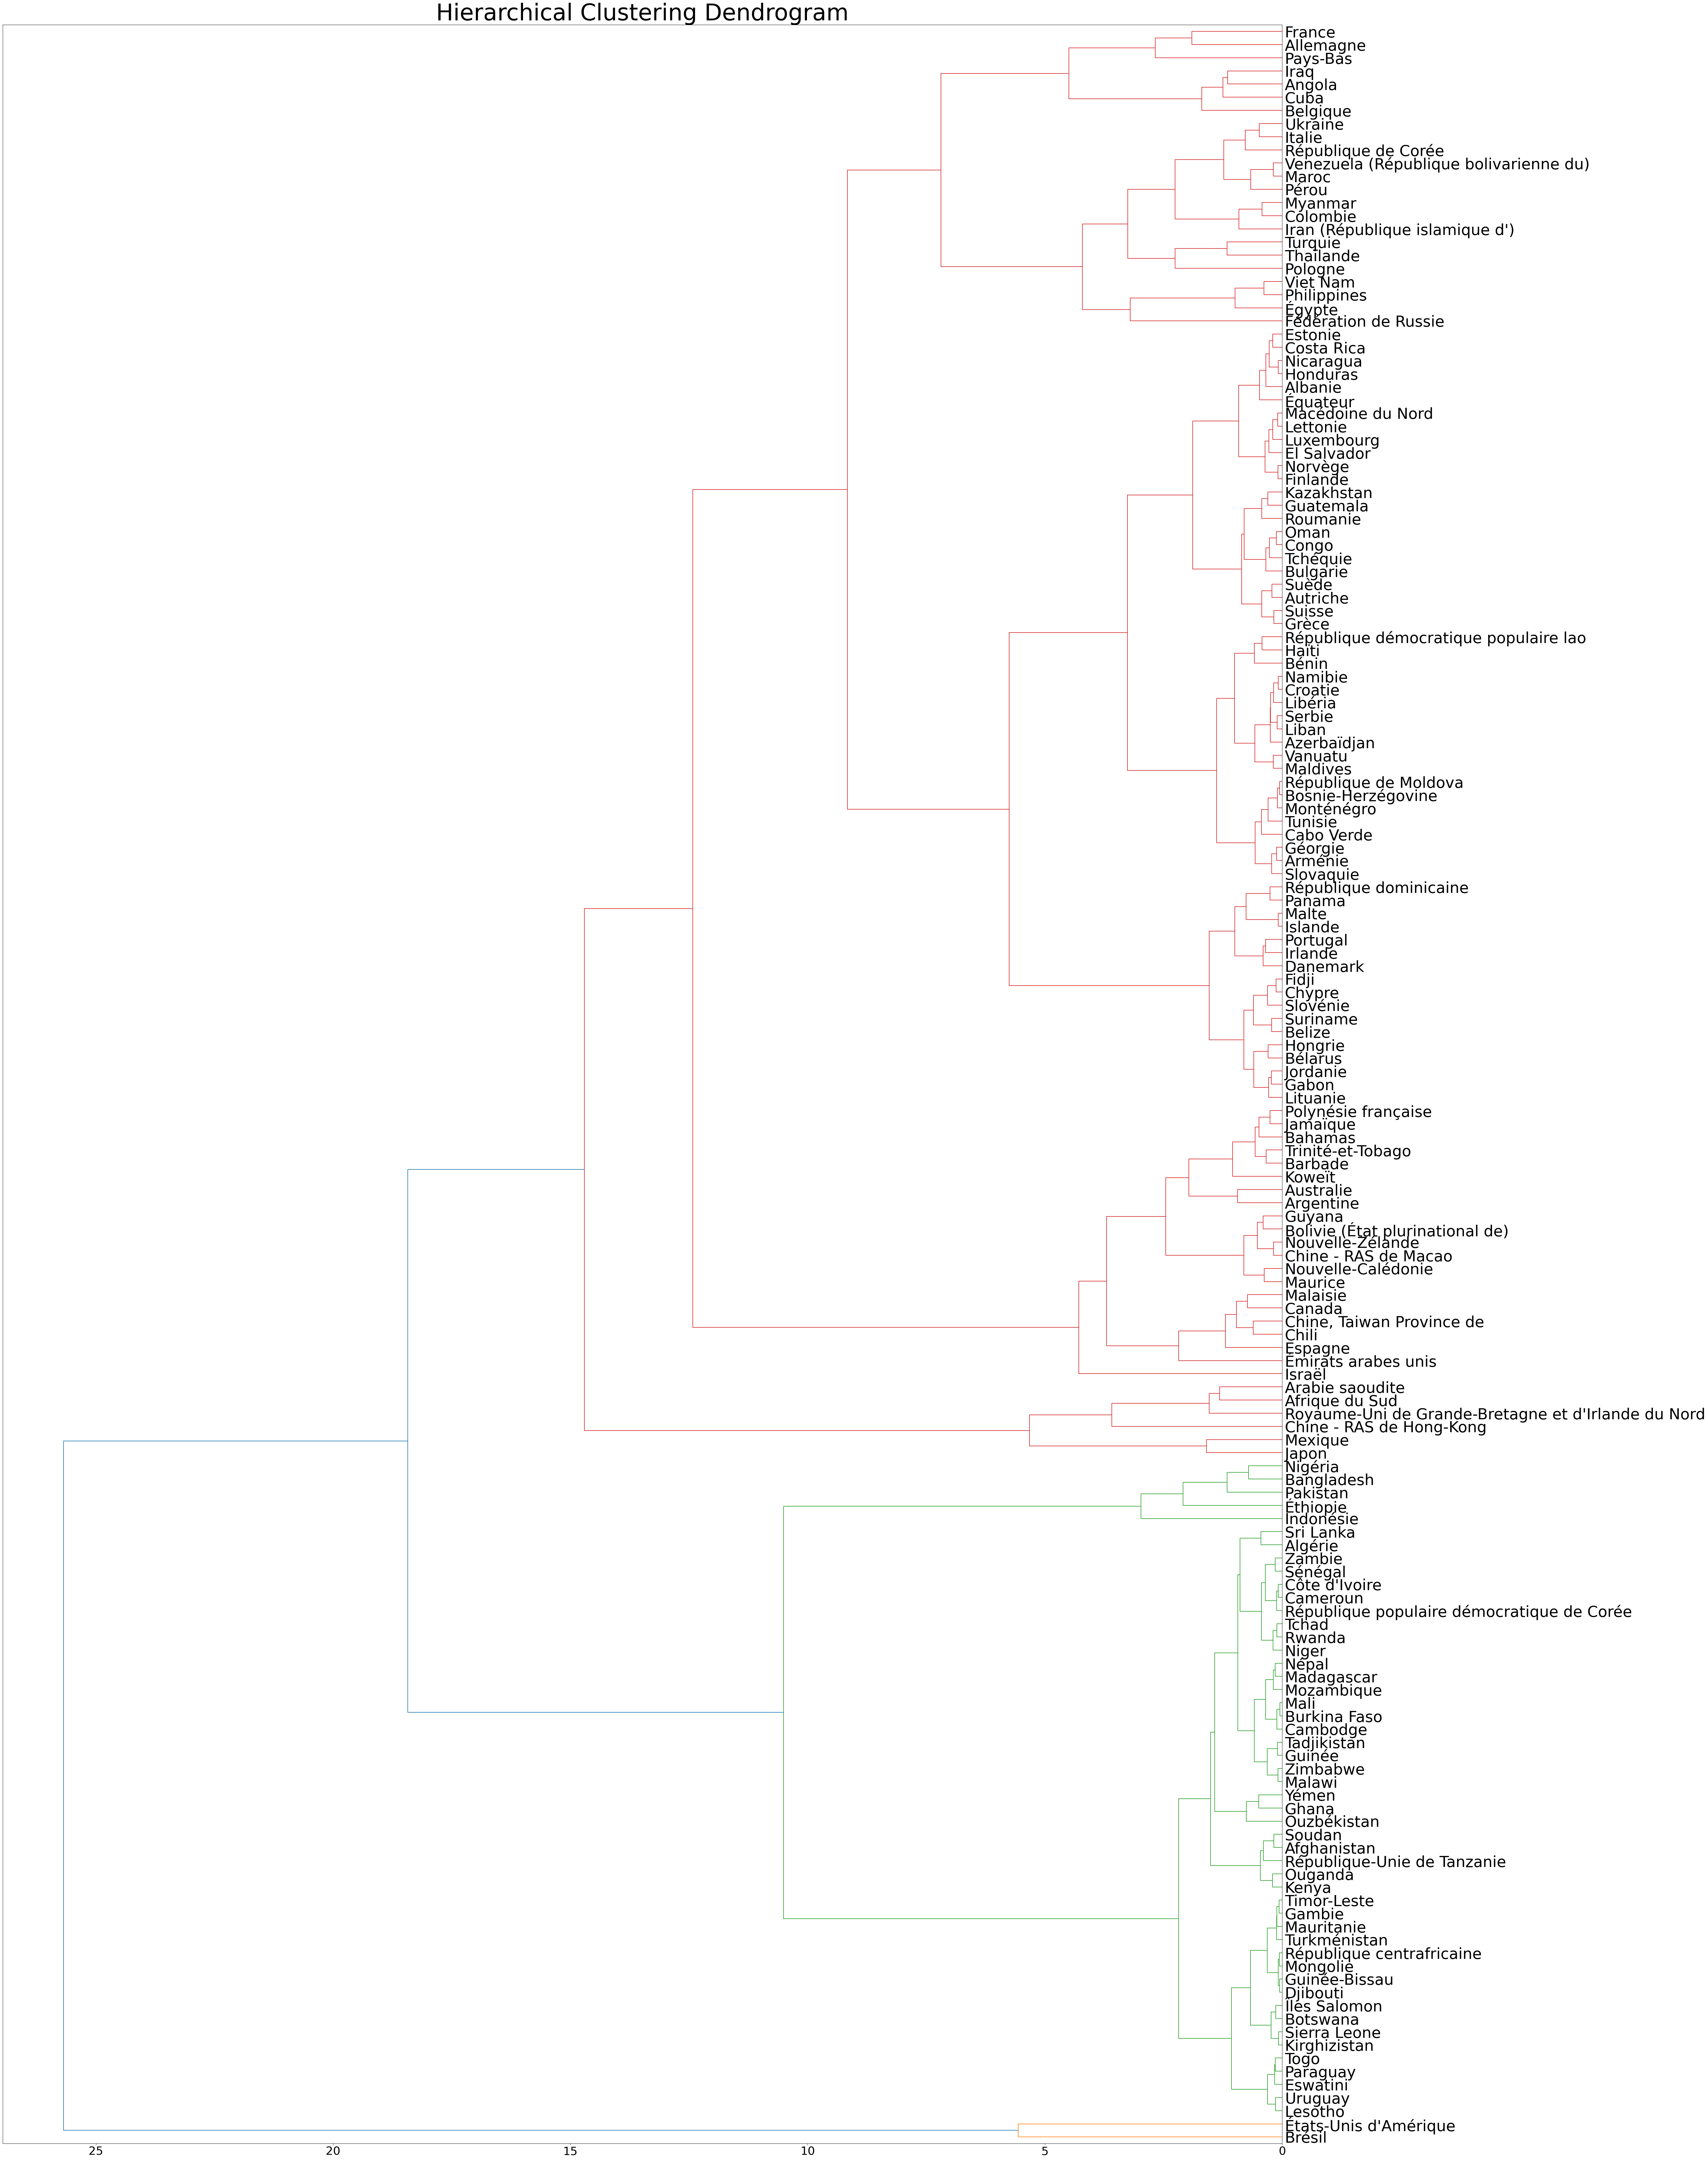

In [8]:
def plot_dendogram(Z, names):
    fig, ax = plt.subplots(1, 1, figsize=(60, 100))

    _ = dendrogram(Z, ax=ax, labels=names, orientation = "left")

    plt.title("Hierarchical Clustering Dendrogram", fontsize=60)
    ax.tick_params(axis='x', which='major', labelsize=30)
    ax.tick_params(axis='y', which='major', labelsize=40)
    plt.show()
    
plot_dendogram(Z, names)

On constate que les pays : Etats-Unis d'Amérique et Brésil sont un cluster à eux seul.

Cela confirme notre hypothèse dans le notebook précédent, on va donc les considérer comme outliers, et les éliminer de notre analyse.

In [9]:
data1 = dispo_pop.drop(dispo_pop[(dispo_pop['Zone'] == "États-Unis d'Amérique") | (dispo_pop['Zone'] == 'Brésil')].index)
data1.head()

Zone  Population  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan    36296113                                             5.0   
1  Afrique du Sud    57009756                                           143.0   
2         Albanie     2884169                                            85.0   
3         Algérie    41389189                                            22.0   
4       Allemagne    82658409                                            71.0   

   Disponibilité de protéines en quantité (g/personne/jour)  Disponibilité intérieure  \
0                                               0.54                             57.0   
1                                              14.11                           2118.0   
2                                               6.26                             47.0   
3                                               1.97                            277.0   
4                                               7.96                           1739.0   

   Exportations - Quantité  Importations - Quantité  
0               132.185185                     29.0  
1                63.000000                    514.0  
2                 0.000000                     38.0  
3                 0.000000                      2.0  
4               646.000000                    842.0

In [10]:
data1 = data1.set_index('Zone')
data1.head()

Population  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                         
Afghanistan       36296113                                             5.0   
Afrique du Sud    57009756                                           143.0   
Albanie            2884169                                            85.0   
Algérie           41389189                                            22.0   
Allemagne         82658409                                            71.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  
Zone                                                                                        
Afghanistan                         57.0               132.185185                     29.0  
Afrique du Sud                    2118.0                63.000000                    514.0  
Albanie                             47.0                 0.000000                     38.0  
Algérie                            277.0                 0.000000                      2.0  
Allemagne                         1739.0               646.000000                    842.0

In [11]:
#Recommencer l'ACH avec nouvelles données
# Préparation des données
X = data1.values
names = data1.index

scaler = StandardScaler()  # Instancier

scaler.fit(X)  # Fit

X_scaled = scaler.transform(X)  # Transformer

In [12]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

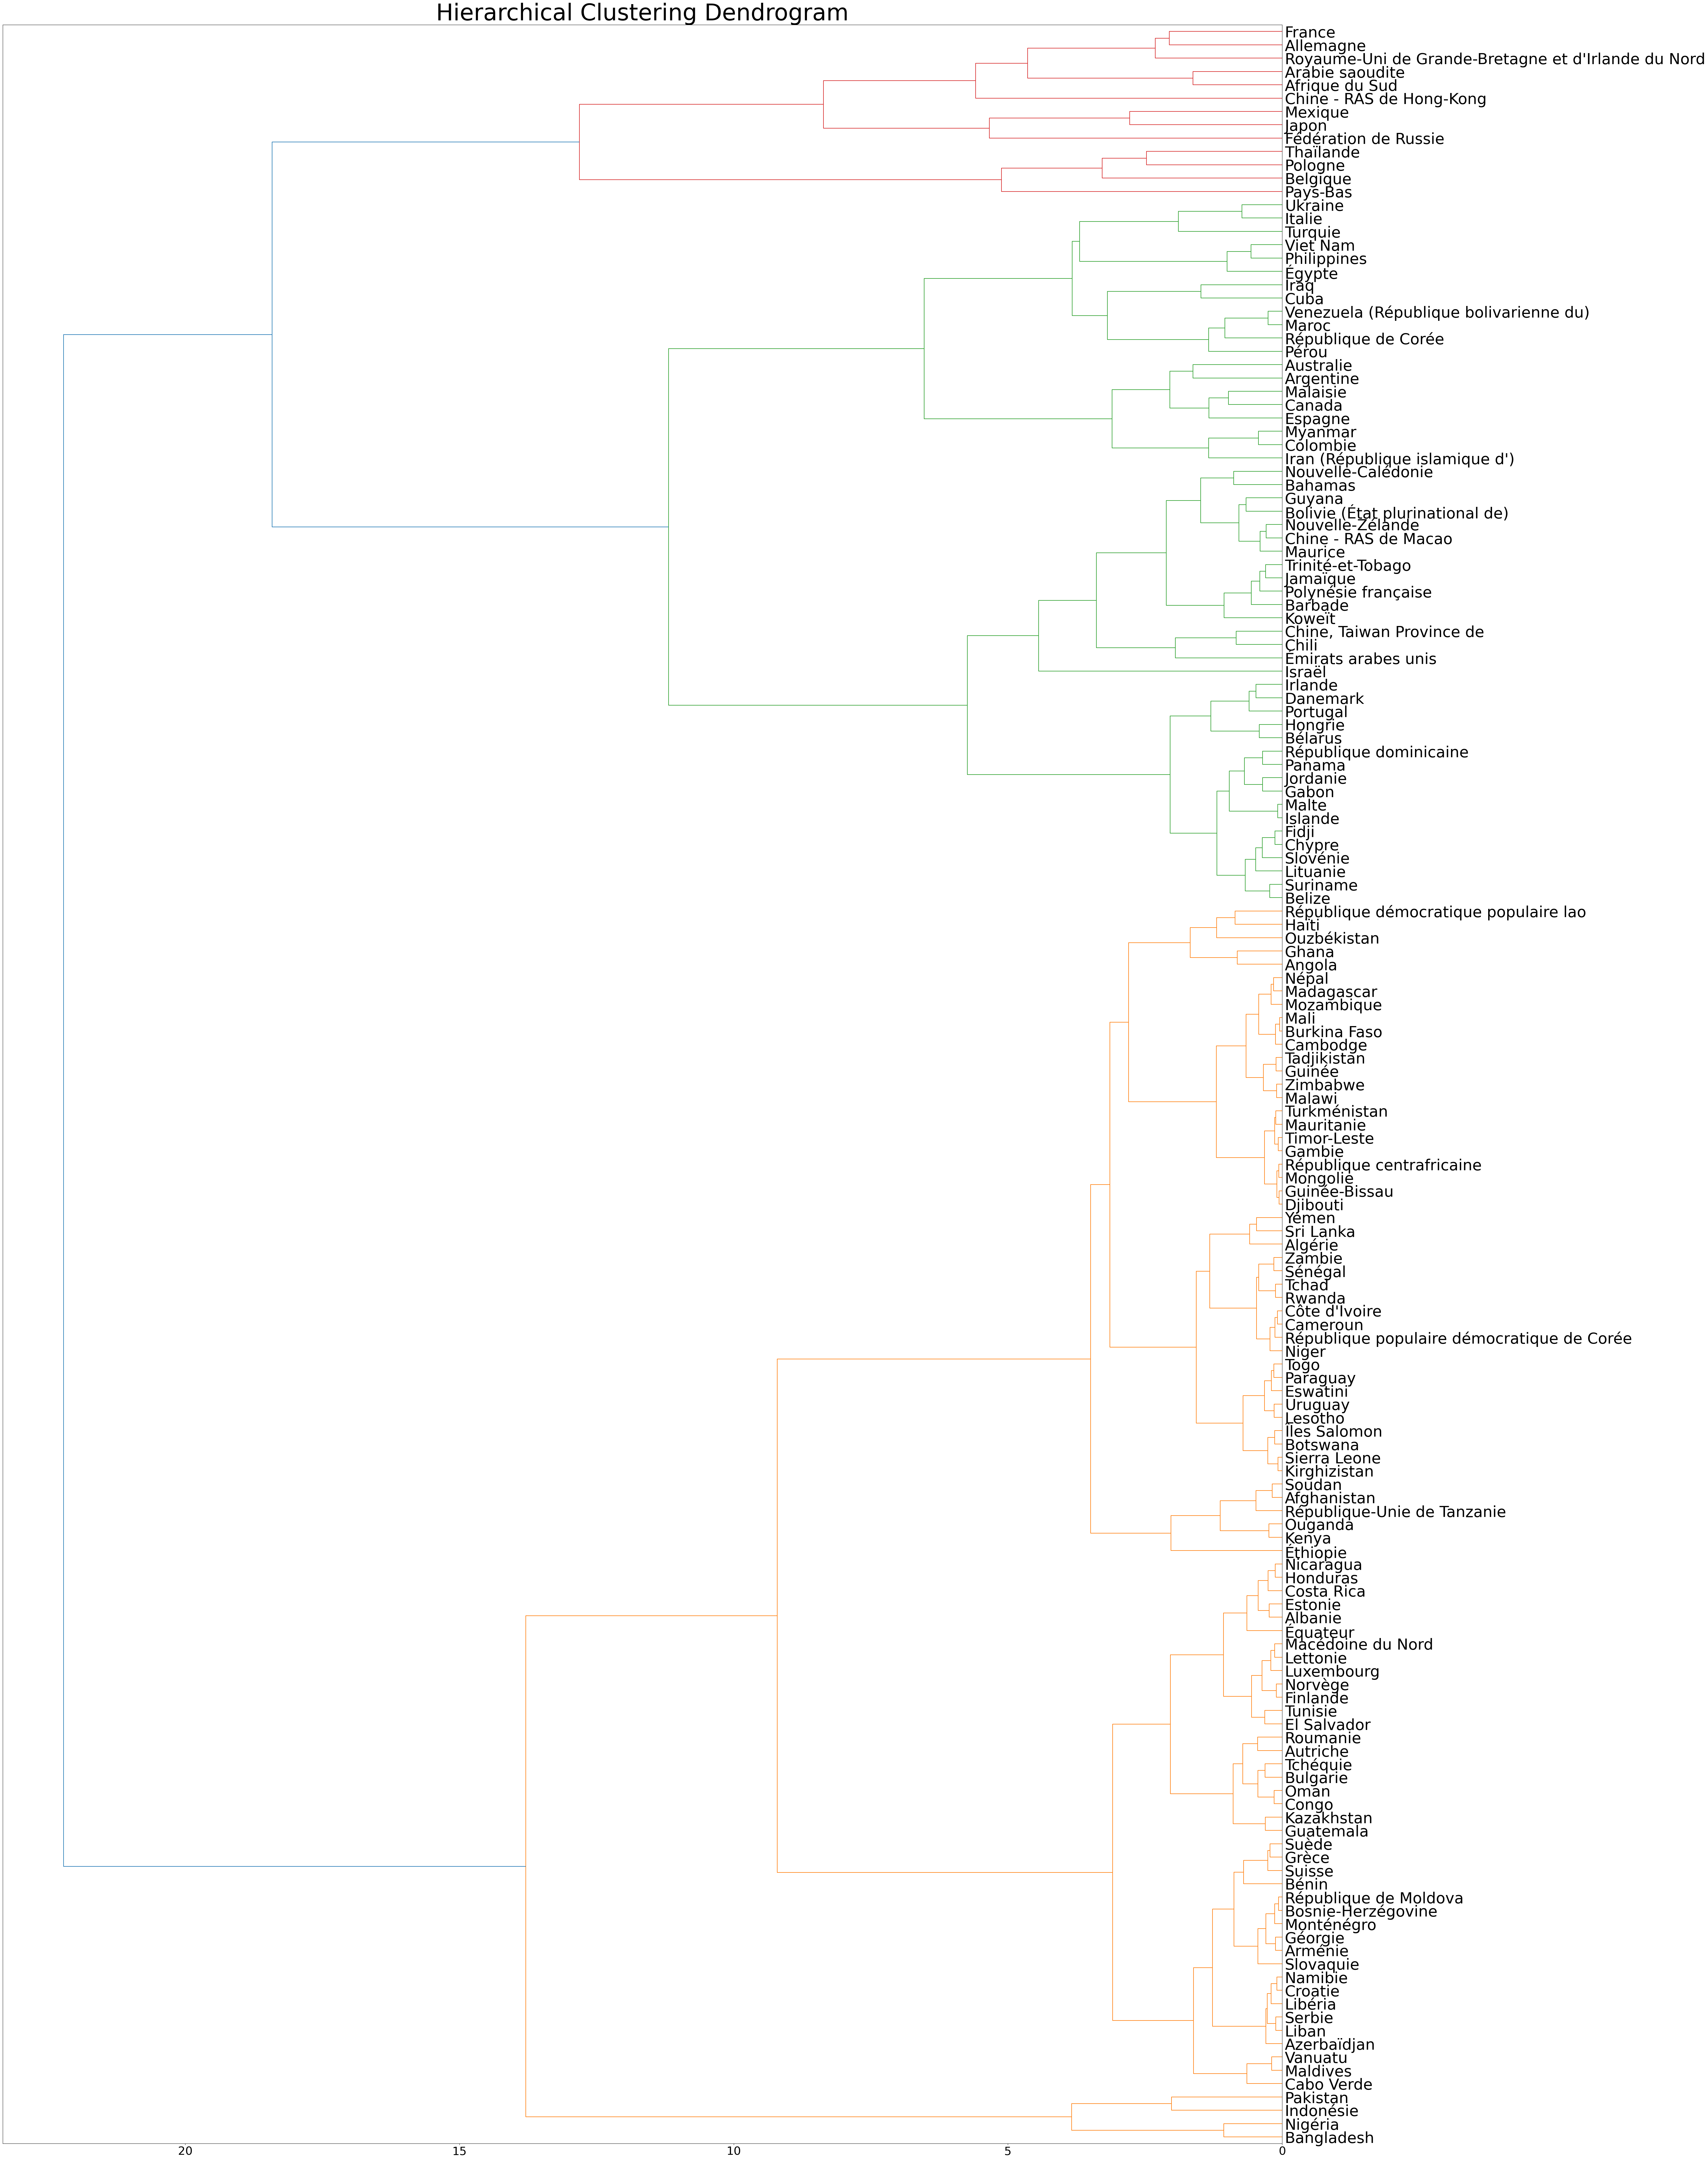

In [13]:
def plot_dendogram(Z, names):
    fig, ax = plt.subplots(1, 1, figsize=(60, 100))

    _ = dendrogram(Z, ax=ax, labels=names, orientation = "left")

    plt.title("Hierarchical Clustering Dendrogram", fontsize=60)
    ax.tick_params(axis='x', which='major', labelsize=30)
    ax.tick_params(axis='y', which='major', labelsize=40)
    plt.show()
    
plot_dendogram(Z, names)

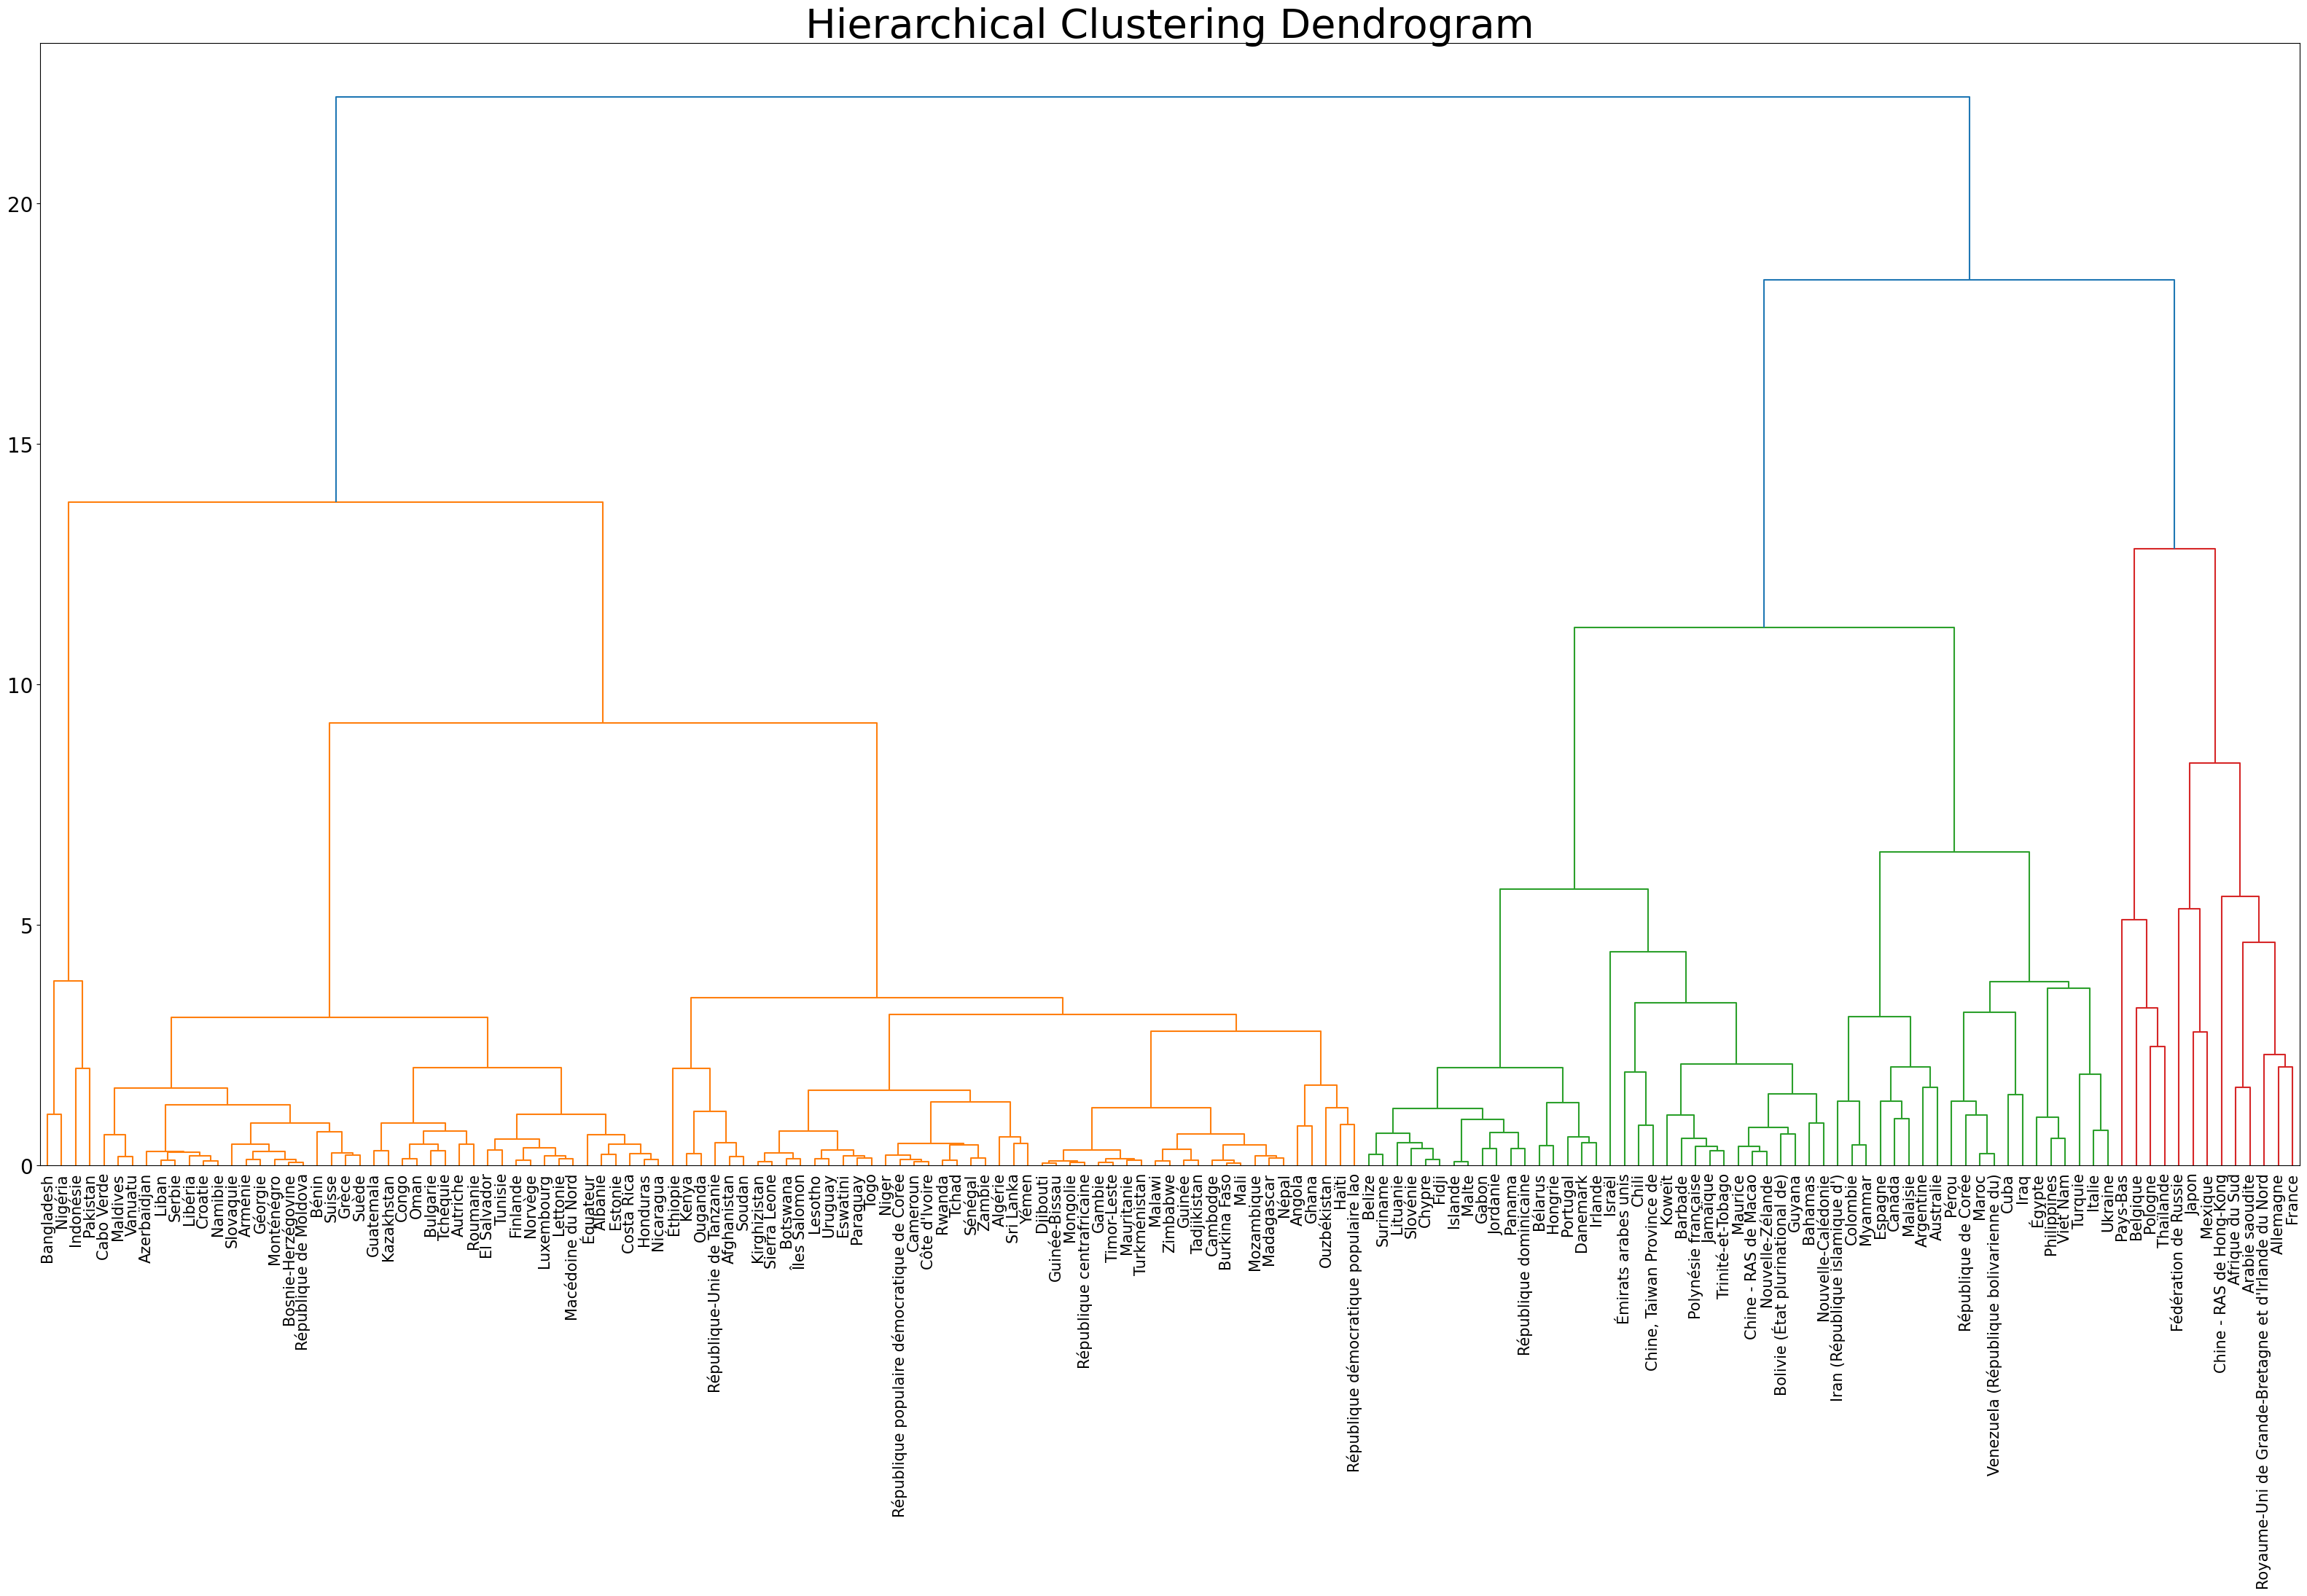

In [14]:
def plot_dendogram(Z, names):
    fig, ax = plt.subplots(1, 1, figsize=(40, 20))

    _ = dendrogram(Z, ax=ax, labels=names)

    plt.title("Hierarchical Clustering Dendrogram", fontsize=40)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=20)
    plt.show()
    
plot_dendogram(Z, names)

In [15]:
Z[:10]

array([[2.30000000e+01, 9.10000000e+01, 4.67193570e-02, 2.00000000e+00],
       [4.00000000e+01, 6.00000000e+01, 5.69734632e-02, 2.00000000e+00],
       [9.70000000e+01, 1.21000000e+02, 6.23414896e-02, 2.00000000e+00],
       [2.00000000e+01, 1.23000000e+02, 6.69994093e-02, 2.00000000e+00],
       [5.40000000e+01, 1.45000000e+02, 6.83426445e-02, 2.00000000e+00],
       [7.80000000e+01, 1.33000000e+02, 7.62882843e-02, 2.00000000e+00],
       [7.00000000e+01, 9.20000000e+01, 8.15830218e-02, 2.00000000e+00],
       [2.60000000e+01, 3.60000000e+01, 8.32453746e-02, 2.00000000e+00],
       [3.70000000e+01, 1.01000000e+02, 9.29083998e-02, 2.00000000e+00],
       [1.60000000e+02, 1.61000000e+02, 9.30416640e-02, 4.00000000e+00]])

In [16]:
# Découper le dendogramme en cluster
k=4
clusters = fcluster(Z,k,criterion='maxclust')
clusters

array([2, 4, 2, 2, 4, 2, 4, 3, 2, 3, 2, 2, 3, 1, 3, 3, 4, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3,
       2, 3, 2, 2, 2, 4, 3, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 3, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 2,
       2, 2, 1, 3, 2, 4, 3, 3, 4, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 3, 2, 2, 3, 3, 2, 2,
       3, 3, 2, 2, 2], dtype=int32)

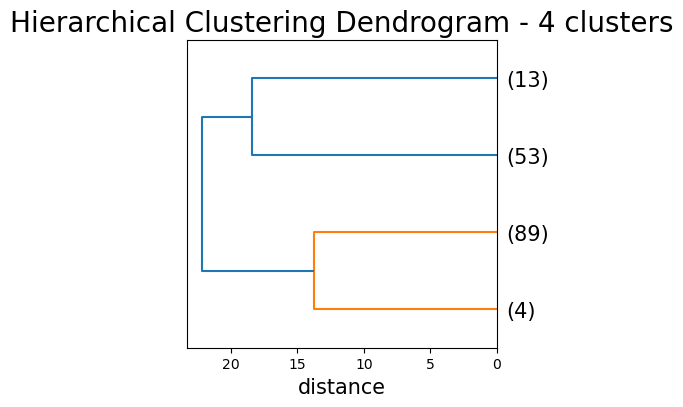

In [17]:
#Découpage du dendrogramme en 4 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(4,4))
plt.title('Hierarchical Clustering Dendrogram - 4 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = data1.index, p=4, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

In [18]:
# Créer dataframe pour stocker les clusters avec le pays
df_clusters = pd.DataFrame({"cluster":clusters,"Zone":names})
df_clusters

cluster                                               Zone
0          2                                        Afghanistan
1          4                                     Afrique du Sud
2          2                                            Albanie
3          2                                            Algérie
4          4                                          Allemagne
5          2                                             Angola
6          4                                    Arabie saoudite
7          3                                          Argentine
8          2                                            Arménie
9          3                                          Australie
10         2                                           Autriche
11         2                                        Azerbaïdjan
12         3                                            Bahamas
13         1                                         Bangladesh
14         3                                            Barbade
15         3                                            Bélarus
16         4                                           Belgique
17         3                                             Belize
18         2                                              Bénin
19         3                    Bolivie (État plurinational de)
20         2                                 Bosnie-Herzégovine
21         2                                           Botswana
22         2                                           Bulgarie
23         2                                       Burkina Faso
24         2                                         Cabo Verde
25         2                                           Cambodge
26         2                                           Cameroun
27         3                                             Canada
28         3                                              Chili
29         4                           Chine - RAS de Hong-Kong
30         3                               Chine - RAS de Macao
31         3                          Chine, Taiwan Province de
32         3                                             Chypre
33         3                                           Colombie
34         2                                              Congo
35         2                                         Costa Rica
36         2                                      Côte d'Ivoire
37         2                                            Croatie
38         3                                               Cuba
39         3                                           Danemark
40         2                                           Djibouti
41         3                                             Égypte
42         2                                        El Salvador
43         3                                Émirats arabes unis
44         2                                           Équateur
45         3                                            Espagne
46         2                                            Estonie
47         2                                           Eswatini
48         2                                           Éthiopie
49         4                               Fédération de Russie
50         3                                              Fidji
51         2                                           Finlande
52         4                                             France
53         3                                              Gabon
54         2                                             Gambie
55         2                                            Géorgie
56         2                                              Ghana
57         2                                              Grèce
58         2                                          Guatemala
59         2                                             Guinée
60         2                                      Guinée-Bissau
61         3                         

In [19]:
data_cluster = pd.merge(data1, df_clusters, on='Zone')
data_cluster = data_cluster.set_index('Zone')
data_cluster.head()

Population  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                         
Afghanistan       36296113                                             5.0   
Afrique du Sud    57009756                                           143.0   
Albanie            2884169                                            85.0   
Algérie           41389189                                            22.0   
Allemagne         82658409                                            71.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
Zone                                                                                         
Afghanistan                         57.0               132.185185                     29.0   
Afrique du Sud                    2118.0                63.000000                    514.0   
Albanie                             47.0                 0.000000                     38.0   
Algérie                            277.0                 0.000000                      2.0   
Allemagne                         1739.0               646.000000                    842.0   

                cluster  
Zone                     
Afghanistan           2  
Afrique du Sud        4  
Albanie               2  
Algérie               2  
Allemagne             4

In [20]:
data_cluster.loc[data_cluster['cluster'] == 1,:]

Population  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                     
Bangladesh   159685424                                             7.0   
Indonésie    264650963                                            25.0   
Nigéria      190873244                                             2.0   
Pakistan     207906209                                            20.0   

            Disponibilité de protéines en quantité (g/personne/jour)  Disponibilité intérieure  \
Zone                                                                                             
Bangladesh                                               0.47                            250.0   
Indonésie                                                2.42                           2323.0   
Nigéria                                                  0.31                            202.0   
Pakistan                                                 1.97                           1282.0   

            Exportations - Quantité  Importations - Quantité  cluster  
Zone                                                                   
Bangladesh               132.185185                      0.0        1  
Indonésie                  0.000000                      1.0        1  
Nigéria                    0.000000                      0.0        1  
Pakistan                   4.000000                      2.0        1

In [21]:
data_cluster.loc[data_cluster['cluster'] == 2,:]

Population  \
Zone                                                     
Afghanistan                                   36296113   
Albanie                                        2884169   
Algérie                                       41389189   
Angola                                        29816766   
Arménie                                        2944791   
Autriche                                       8819901   
Azerbaïdjan                                    9845320   
Bénin                                         11175198   
Bosnie-Herzégovine                             3351525   
Botswana                                       2205080   
Bulgarie                                       7102444   
Burkina Faso                                  19193234   
Cabo Verde                                      537498   
Cambodge                                      16009409   
Cameroun                                      24566073   
Congo                                          5110695   
Costa Rica                                     4949954   
Côte d'Ivoire                                 24437470   
Croatie                                        4182857   
Djibouti                                        944099   
El Salvador                                    6388126   
Équateur                                      16785361   
Estonie                                        1319390   
Eswatini                                       1124805   
Éthiopie                                     106399924   
Finlande                                       5511371   
Gambie                                         2213889   
Géorgie                                        4008716   
Ghana                                         29121465   
Grèce                                         10569450   
Guatemala                                     16914970   
Guinée                                        12067519   
Guinée-Bissau                                  1828145   
Haïti                                         10982366   
Honduras                                       9429013   
Îles Salomon                                    636039   
Kazakhstan                                    18080019   
Kenya                                         50221142   
Kirghizistan                                   6189733   
Lesotho                                        2091534   
Lettonie                                       1951097   
Liban                                          6819373   
Libéria                                        4702226   
Luxembourg                                      591910   
Macédoine du Nord                              2081996   
Madagascar                                    25570512   
Malawi                                        17670196   
Maldives                                        496402   
Mali                                          18512430   
Mauritanie                                     4282570   
Mongolie                                       3113786   
Monténégro                                      627563   
Mozambique                                    28649018   
Namibie                                        2402633   
Népal                                         27632681   
Nicaragua                                      6384846   
Niger                                         21602382   
Norvège                                        5296326   
Oman                                           4665928   
Ouganda                                       41166588   
Ouzbékistan                                   31959785   
Paraguay                                       6867061   
République centrafricaine                      4596023   
République de Moldova                          4059684   
République démocratique populaire lao          6953035   
République populaire démocratique de Corée    25429825   
République-Unie de Tanzanie                   54660339   
Roumanie                                  

In [22]:
data_cluster.loc[data_cluster['cluster'] == 3,:]

Population  \
Zone                                                 
Argentine                                 43937140   
Australie                                 24584620   
Bahamas                                     381755   
Barbade                                     286232   
Bélarus                                    9450231   
Belize                                      375769   
Bolivie (État plurinational de)           11192855   
Canada                                    36732095   
Chili                                     18470439   
Chine - RAS de Macao                        622585   
Chine, Taiwan Province de                 23674546   
Chypre                                     1179678   
Colombie                                  48909839   
Cuba                                      11339254   
Danemark                                   5732274   
Égypte                                    96442591   
Émirats arabes unis                        9487203   
Espagne                                   46647428   
Fidji                                       877459   
Gabon                                      2064822   
Guyana                                      775222   
Hongrie                                    9729823   
Iran (République islamique d')            80673883   
Iraq                                      37552781   
Irlande                                    4753279   
Islande                                     334393   
Israël                                     8243848   
Italie                                    60673701   
Jamaïque                                   2920848   
Jordanie                                   9785843   
Koweït                                     4056099   
Lituanie                                   2845414   
Malaisie                                  31104646   
Malte                                       437933   
Maroc                                     35581255   
Maurice                                    1264499   
Myanmar                                   53382523   
Nouvelle-Calédonie                          277150   
Nouvelle-Zélande                           4702034   
Panama                                     4106769   
Pérou                                     31444298   
Philippines                              105172925   
Polynésie française                         276102   
Portugal                                  10288527   
République de Corée                       51096415   
République dominicaine                    10513104   
Slovénie                                   2076393   
Suriname                                    570496   
Trinité-et-Tobago                          1384059   
Turquie                                   81116450   
Ukraine                                   44487709   
Venezuela (République bolivarienne du)    29402484   
Viet Nam                                  94600648   

                                        Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                     
Argentine                                                                        182.0   
Australie                                                                        192.0   
Bahamas                                                                          182.0   
Barbade                                                                          199.0   
Bélarus                                                                           95.0   
Belize                                                                           110.0   
Bolivie (État plurinational de)                                                  155.0   
Canada                                                                           154.0   
Chili                                                                            153.0   
Chine - RAS de Macao                                                           

In [23]:
data_cluster.loc[data_cluster['cluster'] == 4,:]

Population  \
Zone                                                             
Afrique du Sud                                        57009756   
Allemagne                                             82658409   
Arabie saoudite                                       33101178   
Belgique                                              11419748   
Chine - RAS de Hong-Kong                               7306322   
Fédération de Russie                                 145530082   
France                                                64842509   
Japon                                                127502725   
Mexique                                              124777324   
Pays-Bas                                              17021347   
Pologne                                               37953180   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...    66727460   
Thaïlande                                             69209810   

                                                    Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Afrique du Sud                                                                               143.0   
Allemagne                                                                                     71.0   
Arabie saoudite                                                                              151.0   
Belgique                                                                                      44.0   
Chine - RAS de Hong-Kong                                                                     210.0   
Fédération de Russie                                                                         104.0   
France                                                                                        92.0   
Japon                                                                                         67.0   
Mexique                                                                                      123.0   
Pays-Bas                                                                                      70.0   
Pologne                                                                                      107.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                           120.0   
Thaïlande                                                                                     47.0   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Afrique du Sud                                                                                  14.11          
Allemagne                                                                                        7.96          
Arabie saoudite                                                                                 15.57          
Belgique                                                                                         4.57          
Chine - RAS de Hong-Kong                                                                        22.26          
Fédération de Russie                                                                            10.44          
France                                                                                           8.95          
Japon                                                                                            7.24          
Mexique                                                                                          9.26          
Pays-Bas                                                                                         8.48          
Pologne                                                                                         12.14          
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                        

Nous avons ici 4 clusters comprenant chacun :

    - cluster 1 : 04 pays
    - cluster 2 : 89 pays
    - cluster 3 : 53 pays
    - cluster 4 : 13 pays

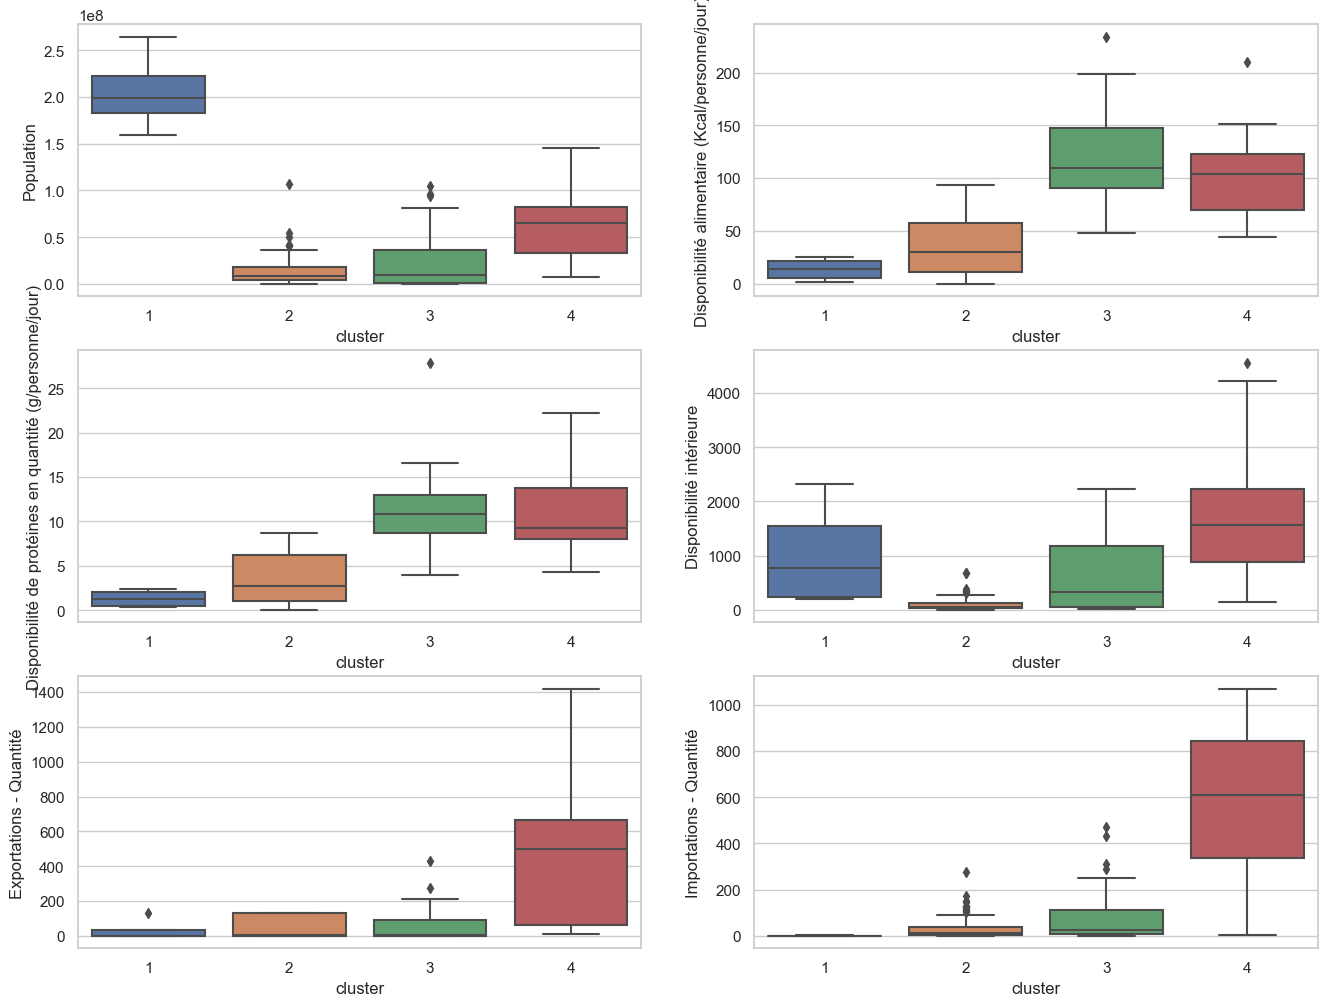

In [24]:
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")
plt.subplot(321)
sns.boxplot(data=data_cluster, x='cluster', y='Population')
plt.subplot(322)
sns.boxplot(data=data_cluster, x= 'cluster', y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.subplot(323)
sns.boxplot(data=data_cluster, x='cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.subplot(324)
sns.boxplot(data=data_cluster, x='cluster', y='Disponibilité intérieure')
plt.subplot(325)
sns.boxplot(data=data_cluster, x='cluster', y='Exportations - Quantité')
plt.subplot(326)
sns.boxplot(data=data_cluster, x= 'cluster', y='Importations - Quantité')
plt.show()

Au vu de ses visualisations, les groupes qui se distinguent le plus sont le cluster 3 et 4

<h3 style="margin: auto; padding: 20px 0; color: #ff0000ff ; text-align: center">Clustering: K-MEANS </h3> 

In [25]:
kmeans=KMeans(n_clusters=4, random_state=0, n_init='auto')

In [26]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [27]:
kmeans.inertia_

429.10269366992003

<h3 style="margin-left: 60px; padding: 20px 0; color: #ff0000ff ">          Méthode du coude</h3> 

In [28]:
#Stocker nos inerties dans liste vide
inertia = []

In [29]:
# Définir la liste du nombre de clusters que l'on veut tester
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(model.inertia_)

C:\Users\clara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clara\anaconda3\Lib\site-packages\sklearn\clust

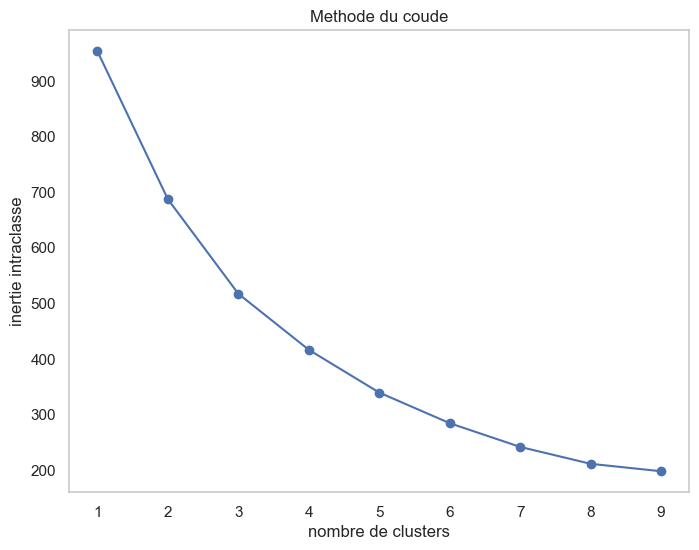

In [101]:
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia, marker='o' )
plt.xlabel('nombre de clusters')
plt.ylabel('inertie intraclasse')
plt.title('Methode du coude')
plt.grid()
plt.show()

Selon la méthode du coude, on devrait utiliser 3 à 4 clusters.

In [30]:
# Ré-entrainer un estimateur
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

C:\Users\clara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [31]:
# Affichage des clusters
kmeans.labels_

array([2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 2])

In [32]:
# Utiliser lettres plutot que nombre
dd = { i:j for i,j in enumerate(list('abc'))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [33]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['c', 'b', 'a', 'c', 'b', 'c', 'b', 'a', 'c', 'a']

In [35]:
# Afficher les pays selon leurs cluster
dt = data1
dt['cluster_kmeans'] = labels
dt.head()

Population  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                         
Afghanistan       36296113                                             5.0   
Afrique du Sud    57009756                                           143.0   
Albanie            2884169                                            85.0   
Algérie           41389189                                            22.0   
Allemagne         82658409                                            71.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
Zone                                                                                         
Afghanistan                         57.0               132.185185                     29.0   
Afrique du Sud                    2118.0                63.000000                    514.0   
Albanie                             47.0                 0.000000                     38.0   
Algérie                            277.0                 0.000000                      2.0   
Allemagne                         1739.0               646.000000                    842.0   

               cluster_kmeans  
Zone                           
Afghanistan                 c  
Afrique du Sud              b  
Albanie                     a  
Algérie                     c  
Allemagne                   b

In [36]:
# Stocker les cluster dans une variable
label = kmeans.labels_
label

array([2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 2])

In [37]:
# Stocker les centroids dans une variable
centroids = kmeans.cluster_centers_
centroids

array([[-0.34603366,  0.81400432,  0.77162353, -0.08156361, -0.24500766,
        -0.17862654],
       [ 1.4275072 ,  0.55614059,  0.69507811,  2.01662393,  1.55792363,
         1.89514585],
       [-0.02305759, -0.80993079, -0.80482932, -0.37637626, -0.13713252,
        -0.26762018]])

In [38]:
# Scaler nos données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# ACP avec 3 composantes
pca = PCA(n_components=3)
pca.fit(X_scaled)

PCA(n_components=3)

In [40]:
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns=['PC1','PC2','PC3'])
X_proj[:10]

PC1       PC2       PC3
0 -1.438980  1.042734  0.442094
1  3.675165  0.454267 -0.746069
2 -0.484212 -0.801421 -0.167662
3 -1.204863  0.792349 -0.399131
4  3.832672  2.781062  2.613167
5 -0.301413  0.707453  0.017228
6  3.750358 -0.253965 -0.265541
7  2.764943 -0.580164 -0.736679
8 -0.853086 -0.454745 -0.076442
9  2.348653 -1.786120 -1.084999

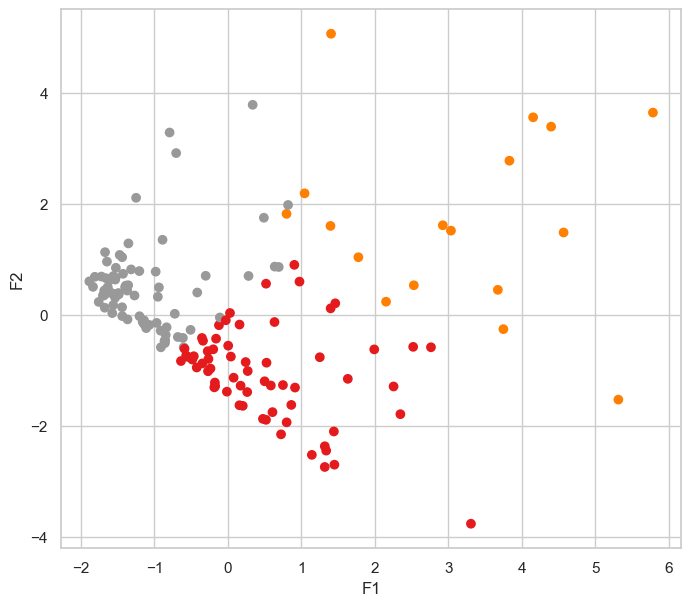

In [41]:
# Projeter les points
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= label, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [42]:
# Utilisation du scaler déjà entrainé
centroids_scaled = scaler.fit_transform(centroids)

# Utilisation de l'ACP déjà entrainé
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ['F1','F2','F3'],
                             index= ['cluster_0','cluster_1','cluster_2'])

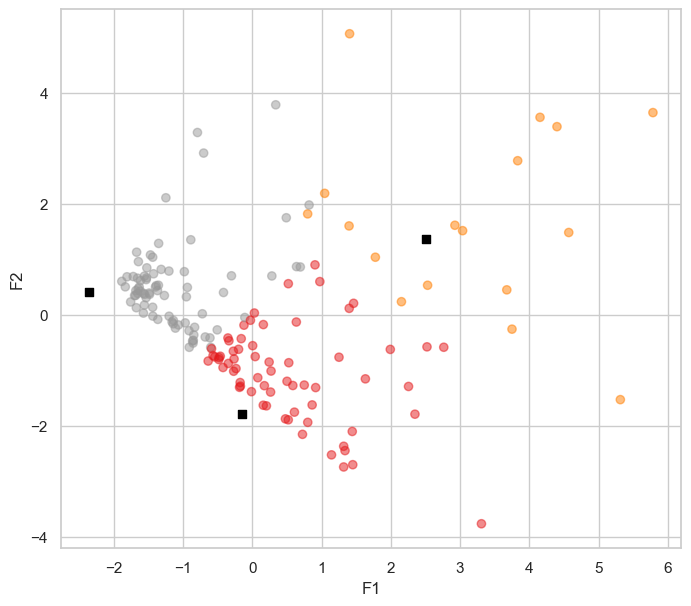

In [43]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= label, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une forme de carré (marker="s") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [44]:
data1.head()

Population  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                         
Afghanistan       36296113                                             5.0   
Afrique du Sud    57009756                                           143.0   
Albanie            2884169                                            85.0   
Algérie           41389189                                            22.0   
Allemagne         82658409                                            71.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
Zone                                                                                         
Afghanistan                         57.0               132.185185                     29.0   
Afrique du Sud                    2118.0                63.000000                    514.0   
Albanie                             47.0                 0.000000                     38.0   
Algérie                            277.0                 0.000000                      2.0   
Allemagne                         1739.0               646.000000                    842.0   

               cluster_kmeans  
Zone                           
Afghanistan                 c  
Afrique du Sud              b  
Albanie                     a  
Algérie                     c  
Allemagne                   b

In [49]:
cluster1 = data1.loc[data1['cluster_kmeans'] == 'a']
cluster1

Population  \
Zone                                                 
Albanie                                    2884169   
Argentine                                 43937140   
Australie                                 24584620   
Autriche                                   8819901   
Bahamas                                     381755   
Barbade                                     286232   
Bélarus                                    9450231   
Belize                                      375769   
Bolivie (État plurinational de)           11192855   
Bulgarie                                   7102444   
Canada                                    36732095   
Chili                                     18470439   
Chine - RAS de Macao                        622585   
Chine, Taiwan Province de                 23674546   
Chypre                                     1179678   
Colombie                                  48909839   
Congo                                      5110695   
Costa Rica                                 4949954   
Cuba                                      11339254   
Danemark                                   5732274   
El Salvador                                6388126   
Émirats arabes unis                        9487203   
Équateur                                  16785361   
Estonie                                    1319390   
Fidji                                       877459   
Finlande                                   5511371   
Gabon                                      2064822   
Guatemala                                 16914970   
Guyana                                      775222   
Honduras                                   9429013   
Hongrie                                    9729823   
Irlande                                    4753279   
Islande                                     334393   
Israël                                     8243848   
Italie                                    60673701   
Jamaïque                                   2920848   
Jordanie                                   9785843   
Koweït                                     4056099   
Lettonie                                   1951097   
Lituanie                                   2845414   
Luxembourg                                  591910   
Macédoine du Nord                          2081996   
Malaisie                                  31104646   
Malte                                       437933   
Maroc                                     35581255   
Maurice                                    1264499   
Myanmar                                   53382523   
Nicaragua                                  6384846   
Norvège                                    5296326   
Nouvelle-Calédonie                          277150   
Nouvelle-Zélande                           4702034   
Oman                                       4665928   
Panama                                     4106769   
Pérou                                     31444298   
Polynésie française                         276102   
Portugal                                  10288527   
République dominicaine                    10513104   
Roumanie                                  19653969   
Slovénie                                   2076393   
Suède                                      9904896   
Suriname                                    570496   
Tchéquie                                  10641034   
Trinité-et-Tobago                          1384059   
Ukraine                                   44487709   
Venezuela (République bolivarienne du)    29402484   

                                        Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                     
Albanie                                                                           85.0   
Argentine                                                                        182.0   
Australie                                                    

In [50]:
len(cluster1)

65

In [46]:
cluster2 = data1.loc[data1['cluster_kmeans'] == 'b']
cluster2

Population  \
Zone                                                             
Afrique du Sud                                        57009756   
Allemagne                                             82658409   
Arabie saoudite                                       33101178   
Chine - RAS de Hong-Kong                               7306322   
Espagne                                               46647428   
Fédération de Russie                                 145530082   
France                                                64842509   
Indonésie                                            264650963   
Iran (République islamique d')                        80673883   
Japon                                                127502725   
Mexique                                              124777324   
Pays-Bas                                              17021347   
Philippines                                          105172925   
Pologne                                               37953180   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...    66727460   
Thaïlande                                             69209810   
Turquie                                               81116450   

                                                    Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Afrique du Sud                                                                               143.0   
Allemagne                                                                                     71.0   
Arabie saoudite                                                                              151.0   
Chine - RAS de Hong-Kong                                                                     210.0   
Espagne                                                                                      105.0   
Fédération de Russie                                                                         104.0   
France                                                                                        92.0   
Indonésie                                                                                     25.0   
Iran (République islamique d')                                                                96.0   
Japon                                                                                         67.0   
Mexique                                                                                      123.0   
Pays-Bas                                                                                      70.0   
Philippines                                                                                   48.0   
Pologne                                                                                      107.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                           120.0   
Thaïlande                                                                                     47.0   
Turquie                                                                                       71.0   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Afrique du Sud                                                                                  14.11          
Allemagne                                                                                        7.96          
Arabie saoudite                                                                                 15.57          
Chine - RAS de Hong-Kong                                                                        22.26          
Espagne                                                                                         12.47          
Fédération de Russie                                                      

In [51]:
len(cluster2)

17

In [52]:
cluster3 = data1.loc[data1['cluster_kmeans'] == 'c']
cluster3

Population  \
Zone                                                     
Afghanistan                                   36296113   
Algérie                                       41389189   
Angola                                        29816766   
Arménie                                        2944791   
Azerbaïdjan                                    9845320   
Bangladesh                                   159685424   
Belgique                                      11419748   
Bénin                                         11175198   
Bosnie-Herzégovine                             3351525   
Botswana                                       2205080   
Burkina Faso                                  19193234   
Cabo Verde                                      537498   
Cambodge                                      16009409   
Cameroun                                      24566073   
Côte d'Ivoire                                 24437470   
Croatie                                        4182857   
Djibouti                                        944099   
Égypte                                        96442591   
Eswatini                                       1124805   
Éthiopie                                     106399924   
Gambie                                         2213889   
Géorgie                                        4008716   
Ghana                                         29121465   
Grèce                                         10569450   
Guinée                                        12067519   
Guinée-Bissau                                  1828145   
Haïti                                         10982366   
Îles Salomon                                    636039   
Iraq                                          37552781   
Kazakhstan                                    18080019   
Kenya                                         50221142   
Kirghizistan                                   6189733   
Lesotho                                        2091534   
Liban                                          6819373   
Libéria                                        4702226   
Madagascar                                    25570512   
Malawi                                        17670196   
Maldives                                        496402   
Mali                                          18512430   
Mauritanie                                     4282570   
Mongolie                                       3113786   
Monténégro                                      627563   
Mozambique                                    28649018   
Namibie                                        2402633   
Népal                                         27632681   
Niger                                         21602382   
Nigéria                                      190873244   
Ouganda                                       41166588   
Ouzbékistan                                   31959785   
Pakistan                                     207906209   
Paraguay                                       6867061   
République centrafricaine                      4596023   
République de Corée                           51096415   
République de Moldova                          4059684   
République démocratique populaire lao          6953035   
République populaire démocratique de Corée    25429825   
République-Unie de Tanzanie                   54660339   
Rwanda                                        11980961   
Sénégal                                       15419355   
Serbie                                         8829628   
Sierra Leone                                   7488423   
Slovaquie                                      5447900   
Soudan                                        40813397   
Sri Lanka                                     21128032   
Suisse                                         8455804   
Tadjikistan                                    8880268   
Tchad                                         15016753   
Timor-Leste                               

In [53]:
len(cluster3)

77

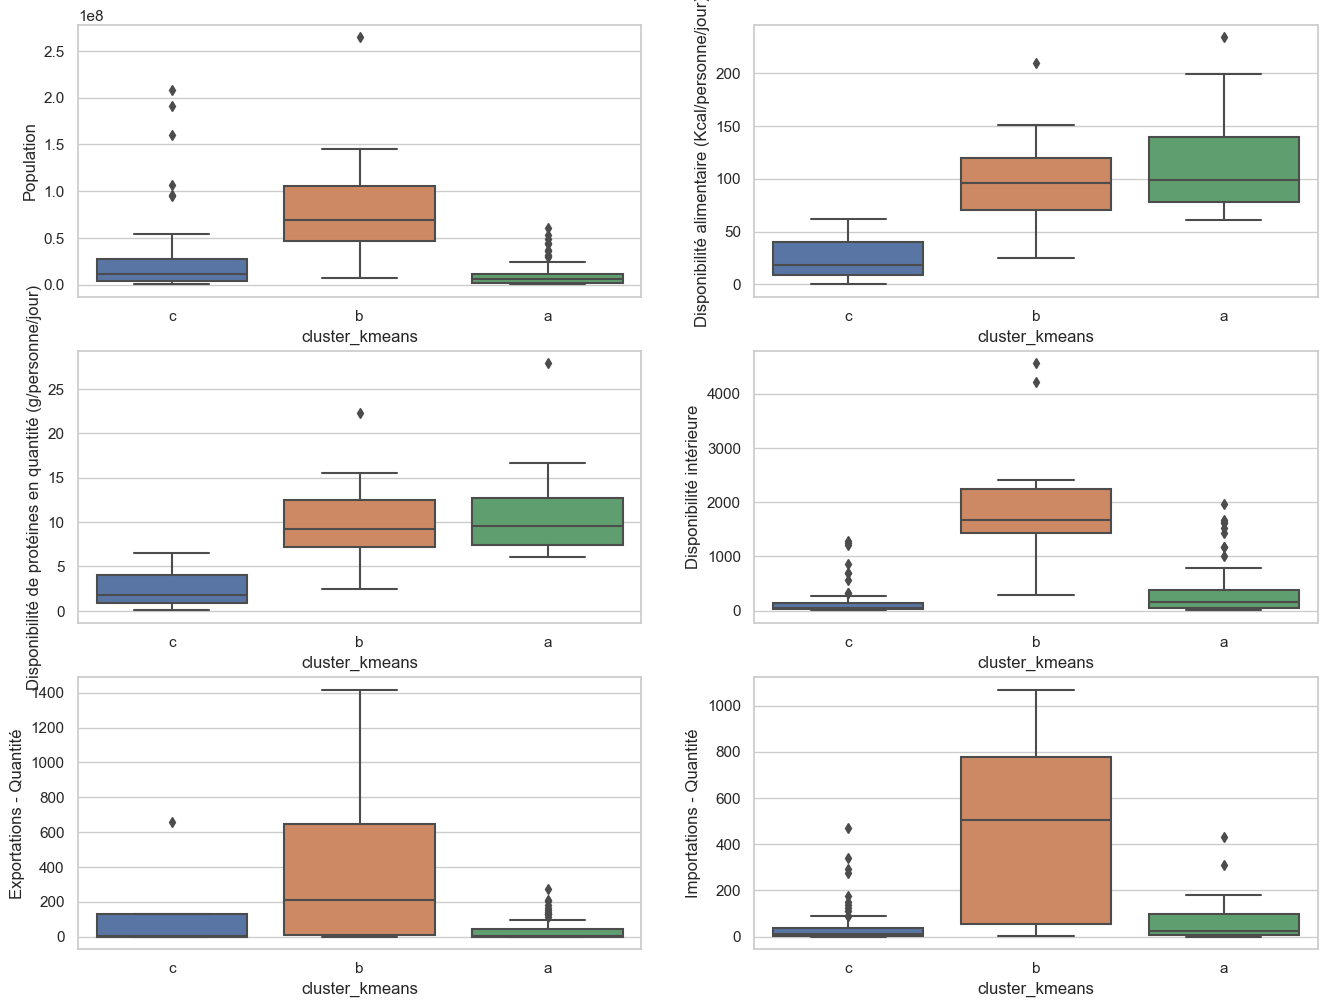

In [54]:
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")
plt.subplot(321)
sns.boxplot(data=data1, x='cluster_kmeans', y='Population')
plt.subplot(322)
sns.boxplot(data=data1, x= 'cluster_kmeans', y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.subplot(323)
sns.boxplot(data=data1, x='cluster_kmeans', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.subplot(324)
sns.boxplot(data=data1, x='cluster_kmeans', y='Disponibilité intérieure')
plt.subplot(325)
sns.boxplot(data=data1, x='cluster_kmeans', y='Exportations - Quantité')
plt.subplot(326)
sns.boxplot(data=data1, x= 'cluster_kmeans', y='Importations - Quantité')
plt.show()

Au vu de ses visualisations, le groupe qui se distingue le plus est le b.

In [55]:
data_cluster1 = data_cluster[['cluster']]
data_cluster1.head()

cluster
Zone                   
Afghanistan           2
Afrique du Sud        4
Albanie               2
Algérie               2
Allemagne             4

In [56]:
data_final = pd.merge(data1, data_cluster1, on='Zone')
data_final.head()

Population  Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                         
Afghanistan       36296113                                             5.0   
Afrique du Sud    57009756                                           143.0   
Albanie            2884169                                            85.0   
Algérie           41389189                                            22.0   
Allemagne         82658409                                            71.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
Zone                                                                                         
Afghanistan                         57.0               132.185185                     29.0   
Afrique du Sud                    2118.0                63.000000                    514.0   
Albanie                             47.0                 0.000000                     38.0   
Algérie                            277.0                 0.000000                      2.0   
Allemagne                         1739.0               646.000000                    842.0   

               cluster_kmeans  cluster  
Zone                                    
Afghanistan                 c        2  
Afrique du Sud              b        4  
Albanie                     a        2  
Algérie                     c        2  
Allemagne                   b        4

<h3 style="margin: auto; padding: 20px 0; color: #ff0000ff ; text-align: center">Conclusion </h3> 

In [57]:
data_final.loc[(data_final['cluster'] == 4) & (data_final['cluster_kmeans'] == 'b')]

Population  \
Zone                                                             
Afrique du Sud                                        57009756   
Allemagne                                             82658409   
Arabie saoudite                                       33101178   
Chine - RAS de Hong-Kong                               7306322   
Fédération de Russie                                 145530082   
France                                                64842509   
Japon                                                127502725   
Mexique                                              124777324   
Pays-Bas                                              17021347   
Pologne                                               37953180   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...    66727460   
Thaïlande                                             69209810   

                                                    Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Afrique du Sud                                                                               143.0   
Allemagne                                                                                     71.0   
Arabie saoudite                                                                              151.0   
Chine - RAS de Hong-Kong                                                                     210.0   
Fédération de Russie                                                                         104.0   
France                                                                                        92.0   
Japon                                                                                         67.0   
Mexique                                                                                      123.0   
Pays-Bas                                                                                      70.0   
Pologne                                                                                      107.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                           120.0   
Thaïlande                                                                                     47.0   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Afrique du Sud                                                                                  14.11          
Allemagne                                                                                        7.96          
Arabie saoudite                                                                                 15.57          
Chine - RAS de Hong-Kong                                                                        22.26          
Fédération de Russie                                                                            10.44          
France                                                                                           8.95          
Japon                                                                                            7.24          
Mexique                                                                                          9.26          
Pays-Bas                                                                                         8.48          
Pologne                                                                                         12.14          
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                              13.77          
Thaïlande                                                                                        4.35          

                                                    Disponibilité intérieure  \
Zone                                             

Voici la liste des pays dans lesquelles il serait interessant d'exporter nos poulets. 

Néanmoins, de cette liste, nous pouvons retirer la France, vu que nous y sommes déjà, ainsi que la Russie au vu du contexte politique actuel.

Ce qui nous donne :

    - Afrique du Sud
    - Allemagne
    - Arabie Saoudite
    - Belgique
    - Chine - RAS de Hong-Kong
    - Japon
    - Mexique
    - Pays-Bas
    - Pologne
    - Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
    - Thaïlande
   
